In [1]:
import random
import math
import matplotlib
from pylab import plot, legend, subplot, grid, xlabel, ylabel, show, title

from pyneurgen.neuralnet import NeuralNet
from pyneurgen.nodes import BiasNode, Connection

In [2]:
#   all samples are drawn from this population
pop_len = 200
factor = 1.0 / float(pop_len)
population = [[i, math.sin(float(i) * factor * 10.0) + \
                random.gauss(float(i) * factor, .2)]
                    for i in range(pop_len)]

all_inputs = []
all_targets = []

def population_gen(population):
    """
    This function shuffles the values of the population and yields the
    items in a random fashion.

    """

    pop_sort = [item for item in population]
    random.shuffle(pop_sort)

    for item in pop_sort:
        yield item

#   Build the inputs
for position, target in population_gen(population):
    pos = float(position)
    all_inputs.append([random.random(), pos * factor])
    all_targets.append([target])

In [3]:
net = NeuralNet()
net.init_layers(2, [10], 1)

net.randomize_network()
net.set_halt_on_extremes(True)

#   Set to constrain beginning weights to -.5 to .5
#       Just to show we can
net.set_random_constraint(.5)
net.set_learnrate(.1)

In [4]:
net.set_all_inputs(all_inputs)
net.set_all_targets(all_targets)

In [5]:
length = len(all_inputs)
learn_end_point = int(length * .8)

net.set_learn_range(0, learn_end_point)
net.set_test_range(learn_end_point + 1, length - 1)

In [6]:
net.layers[1].set_activation_type('tanh')

In [7]:
net.learn(epochs=125, show_epoch_results=True,
    random_testing=False)

epoch: 0 MSE: 0.39416159354861763
epoch: 1 MSE: 0.32549669345497784
epoch: 2 MSE: 0.2983813270512147
epoch: 3 MSE: 0.28752651908588367
epoch: 4 MSE: 0.2825711887423443
epoch: 5 MSE: 0.27962033094491134
epoch: 6 MSE: 0.27772316848591805
epoch: 7 MSE: 0.27647590590502175
epoch: 8 MSE: 0.27553981947137013
epoch: 9 MSE: 0.2747065548743767
epoch: 10 MSE: 0.2738822400602049
epoch: 11 MSE: 0.2730275573954274
epoch: 12 MSE: 0.27212317017164867
epoch: 13 MSE: 0.27115671987428647
epoch: 14 MSE: 0.2701188342338119
epoch: 15 MSE: 0.26900217613233546
epoch: 16 MSE: 0.2678014520982712
epoch: 17 MSE: 0.2665136942065595
epoch: 18 MSE: 0.26513853332668325
epoch: 19 MSE: 0.2636782792330192
epoch: 20 MSE: 0.262137664574901
epoch: 21 MSE: 0.2605231830152002
epoch: 22 MSE: 0.2588420695629136
epoch: 23 MSE: 0.2571010972558575
epoch: 24 MSE: 0.2553054418306525
epoch: 25 MSE: 0.25345785432062395
epoch: 26 MSE: 0.2515582843299846
epoch: 27 MSE: 0.24960395928129014
epoch: 28 MSE: 0.24758980439133488
epoch: 29 M

In [8]:
mse = net.test()

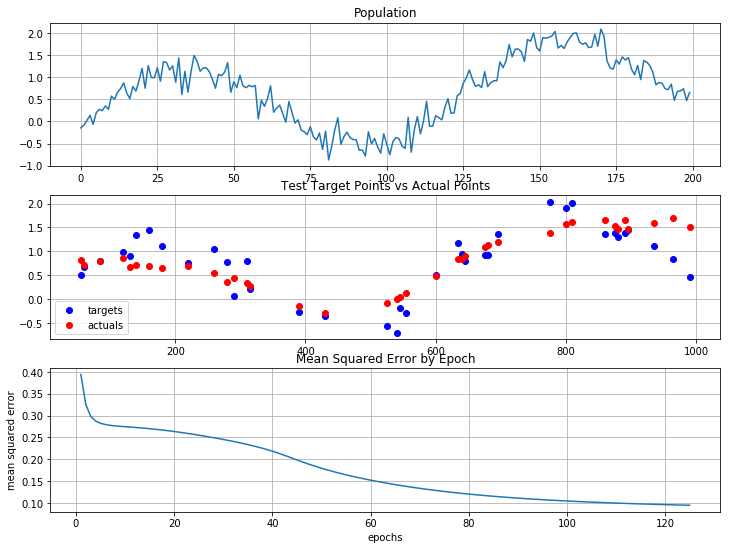

In [9]:
test_positions = [item[0][1] * 1000.0 for item in net.get_test_data()]

all_targets1 = [item[0][0] for item in net.test_targets_activations]
allactuals = [item[1][0] for item in net.test_targets_activations]

#   This is quick and dirty, but it will show the results
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
subplot(3, 1, 1)
plot([i[1] for i in population])
title("Population")
grid(True)

subplot(3, 1, 2)
plot(test_positions, all_targets1, 'bo', label='targets')
plot(test_positions, allactuals, 'ro', label='actuals')
grid(True)
legend(loc='lower left', numpoints=1)
title("Test Target Points vs Actual Points")

subplot(3, 1, 3)
plot(range(1, len(net.accum_mse) + 1, 1), net.accum_mse)
xlabel('epochs')
ylabel('mean squared error')
grid(True)
title("Mean Squared Error by Epoch")

show()